# Single image super-resolution demonstration

Select GPU hardware acceleration (TPU not supported by TensorFlow 2) in Runtime > Change runtime type

In [33]:
%tensorflow_version 2.x

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Repository clone and dataset download (first time only)

In [0]:
"""
%mkdir gdrive/My Drive/Part_II_Dissertation
%cd gdrive/My Drive/Part_II_Dissertation
!git clone https://github.com/EmptyJackson/video-super-resolution
"""

In [0]:
"""
%cd video-super-resolution
"""

## Repository update (subsequent uses)

In [34]:
%cd gdrive/My Drive/Part_II_Dissertation/video-super-resolution

[Errno 2] No such file or directory: 'gdrive/My Drive/Part_II_Dissertation/video-super-resolution'
/content/gdrive/My Drive/Part_II_Dissertation/video-super-resolution


In [35]:
!git pull

Already up to date.


## Demonstration

In [37]:
#!python src/tools/crop_image.py data/div2k/DIV2K_valid_LR_bicubic/X2/0855x2.png lr_crop.png 240
#!python src/tools/crop_image.py data/div2k/DIV2K_valid_HR/0855.png hr_orig.png 240 standard 2
!python src/tools/crop_image.py data/div2k/DIV2K_train_LR_bicubic/X2/0797x2.png lr_crop.png 240
!python src/tools/crop_image.py data/div2k/DIV2K_train_HR/0797.png hr_orig.png 240 standard 2
#!python src/tools/crop_image.py data/div2k/DIV2K_train_LR_bicubic/X2/0049x2.png lr_crop.png 240
#!python src/tools/crop_image.py data/div2k/DIV2K_train_HR/0049.png hr_orig.png 240 standard 2
!python src/upscale_image.py lr_crop.png hr_pred.png network checkpoints/edsr_x2_240p/ 160
!python src/upscale_image.py lr_crop.png hr_bicb.png bicubic 2

"""
!python src/tools/crop_image.py lr_crop.png lr_crop.png 240 square
!python src/tools/crop_image.py hr_bicub.png hr_bicb.png 480 square
!python src/tools/crop_image.py hr_pred.png hr_pred.png 480 square
"""

2020-02-29 12:40:20.215358: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Loading model from checkpoints/edsr_x2_240p/arch.json
Restoring model weights from checkpoints/edsr_x2_240p/160.h5


'\n!python src/tools/crop_image.py lr_crop.png lr_crop.png 240 square\n!python src/tools/crop_image.py hr_bicub.png hr_bicb.png 480 square\n!python src/tools/crop_image.py hr_pred.png hr_pred.png 480 square\n'

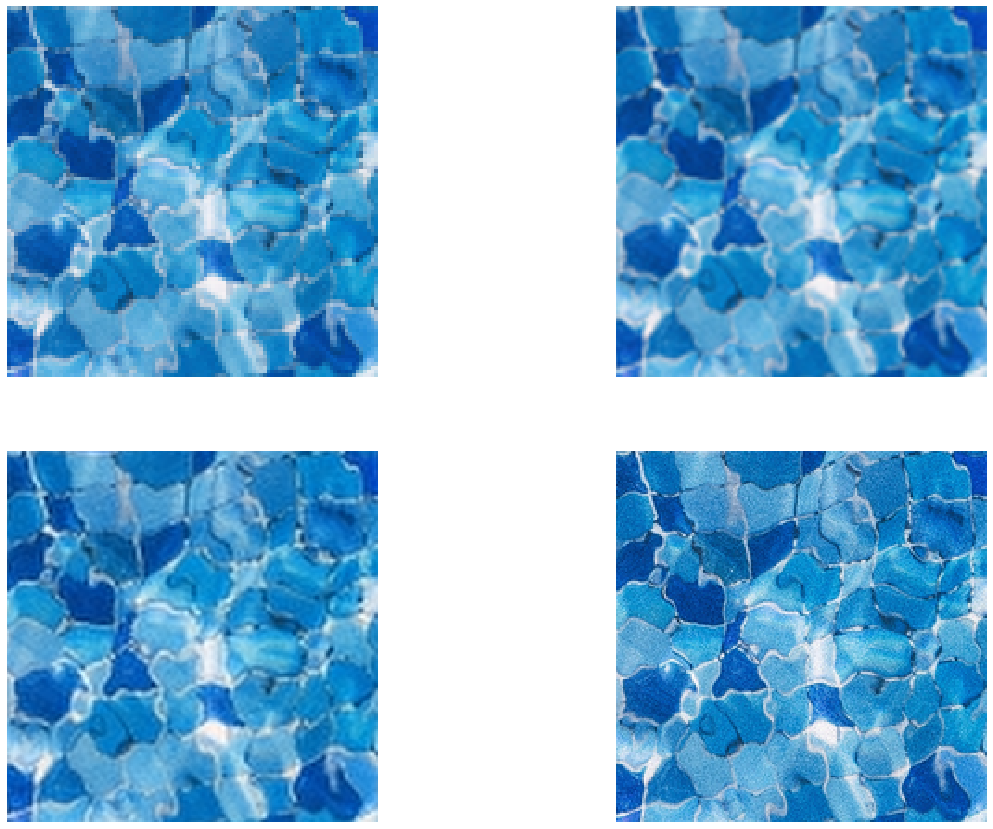

In [43]:
import matplotlib.pyplot as plt
s = 2

fig = plt.figure(figsize=(20,15))
fig.add_subplot(2, 2, 1)
im = plt.imread('lr_crop.png')
im = im[50:150, 100:200, :]
plt.axis('off')
plt.imshow(im)
fig.add_subplot(2, 2, 2)
im = plt.imread('hr_bicb.png')
im = im[50*s:150*s, 100*s:200*s, :]
plt.axis('off')
plt.imshow(im)
fig.add_subplot(2, 2, 3)
im = plt.imread('hr_pred.png')
im = im[50*s:150*s, 100*s:200*s, :]
plt.axis('off')
plt.imshow(im)
fig.add_subplot(2, 2, 4)
im = plt.imread('hr_orig.png')
im = im[50*s:150*s, 100*s:200*s, :]
plt.axis('off')
plt.imshow(im)
#plt.subplots_adjust(wspace=0.05)
plt.show()